In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotLossAccuracy(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

def plotValidationLoss(history):
    print(history)
    val_loss = history.history["val_loss"]
    epochs = range(1, len(val_loss) + 1)
    plt.plot(epochs, val_loss, "b--",
    label="Validation loss")
    plt.title("Effect of insufficient model capacity on validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()



def plotConfusionMatrix(true_labels, predicted_labels, class_names):
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    


In [108]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32
BATCH_SIZE = 256

TRAIN_DIR = 'data/train'
VALIDATION_DIR = 'data/validation'
TEST_DIR = 'data/test'

train_dataset = image_dataset_from_directory(TRAIN_DIR, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)
validation_dataset = image_dataset_from_directory(VALIDATION_DIR, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)
test_dataset = image_dataset_from_directory(TEST_DIR, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


2024-06-12 17:00:15.097886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


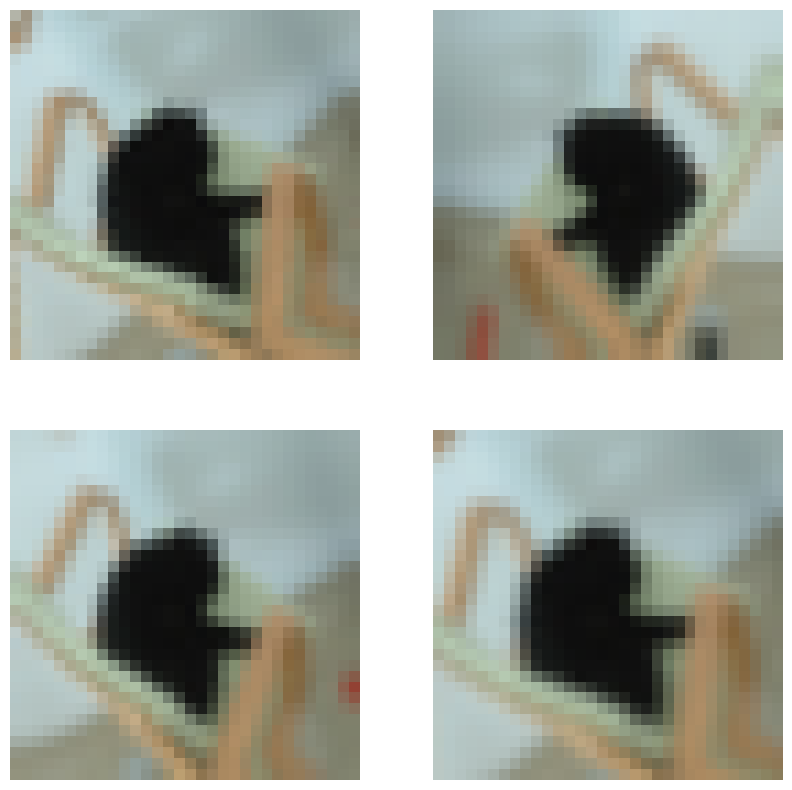

In [109]:

from tensorflow import keras
from keras import layers

data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
#layers.RandomFlip("vertical"),
#layers.RandomCrop(25,25),
#layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#layers.RandomContrast(0.2),
#layers.RandomBrightness([-0.8,0.8]),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2)
]
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(4):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")




Model: "functional_259"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_177 (InputLayer)    │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_115 (Rescaling)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_405 (Conv2D)             │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_222               │ (None, 15, 15, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_406 (Conv2D)             │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_223               │ (None, 7, 7, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_407 (Conv2D)             │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_224               │ (None, 2, 2, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_92 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,586 (1.74 MB)

 Trainable params: 456,586 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 500ms/step - accuracy: 0.1955 - loss: 2.1659 - val_accuracy: 0.3522 - val_loss: 1.8002
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 487ms/step - accuracy: 0.3760 - loss: 1.7314 - val_accuracy: 0.4580 - val_loss: 1.5414
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 478ms/step - accuracy: 0.4500 - loss: 1.5331 - val_accuracy: 0.5091 - val_loss: 1.3882
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 531ms/step - accuracy: 0.5071 - loss: 1.3898 - val_accuracy: 0.5166 - val_loss: 1.3413
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 500ms/step - accuracy: 0.5412 - loss: 1.2951 - val_accuracy: 0.5315 - val_loss: 1.3206
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 460ms/step - accuracy: 0.5766 - loss: 1.2194 - val_accuracy: 0.5854 - val_loss: 1.1750
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 451ms/step - accuracy: 0.5966 - loss: 1.1511 - val_accuracy: 0.6087 - val_loss: 1.0994
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 458ms/step - accuracy: 0.6218 - loss: 1

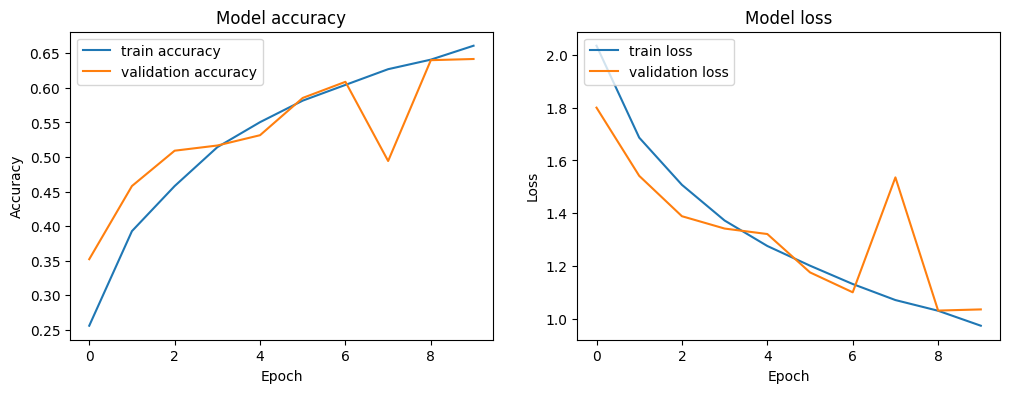

In [128]:
NUMBER_OF_EPOCHS=10
LEARNING_RATE=0.001

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
#x = data_augmentation(inputs)
#x = layers.Rescaling(1. / 255)(x)
x = layers.Rescaling(1. / 255)(inputs)


x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
#x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.6)(x)


outputs = layers.Dense(10, activation='softmax')(x)


model = keras.Model(inputs, outputs)
model.summary()
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train_dataset, epochs=NUMBER_OF_EPOCHS, validation_data=validation_dataset)

val_loss, val_acc = model.evaluate(test_dataset)
print('val_acc:', val_acc)
plotLossAccuracy(history)